# Applied ML

In [1]:
# Normal stack of pandas, numpy, matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Statistical test library
import scipy.stats as stats

%matplotlib inline

# Data pre-processing

In [2]:
# Load the dataset
original = pd.read_csv("CrowdstormingDataJuly1st.csv", parse_dates=['birthday'], infer_datetime_format=True)

In [3]:
original.describe()

/Applications/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,145765.000000,143785.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,124621.000000,124621.000000,146028.000000,146028.000000,145865.000000,1.458650e+05,1.458650e+05,145865.000000,1.458650e+05,145865.000000
mean,181.935938,76.075662,2.921166,1.278344,0.708241,0.934581,0.338058,0.385364,0.011381,0.012559,0.264255,0.302862,1534.827444,29.642842,0.346276,1.969741e+04,6.310849e-04,0.452026,2.044023e+04,0.002994
std,6.738726,7.140906,3.413633,1.790725,1.116793,1.383059,0.906481,0.795333,0.107931,0.112889,0.295382,0.293020,918.736625,27.496189,0.032246,1.271262e+05,4.735857e-03,0.217469,1.306157e+05,0.019723
min,161.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001
25%,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,641.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1604.000000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,2345.000000,44.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,1.000000,1.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660


In [4]:
from pandas.tools.plotting import scatter_matrix

#scatter_matrix(original, figsize=(30, 30), diagonal='histogram')

In [5]:
# First glimpse at data content
original.ix[:10,:13]

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,1983-08-31,177.0,72.0,Attacking Midfielder,1,0,0,1,0
1,john-utaka,John Utaka,Montpellier HSC,France,1982-01-08,179.0,82.0,Right Winger,1,0,0,1,0
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,1992-12-17,181.0,79.0,NaN,1,0,1,0,0
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,1993-08-31,191.0,87.0,Center Back,1,1,0,0,0
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,1991-07-18,172.0,70.0,Right Midfielder,1,1,0,0,0
5,aaron-hughes,Aaron Hughes,Fulham FC,England,1979-11-08,182.0,71.0,Center Back,1,0,0,1,0
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,1985-11-10,187.0,80.0,Left Fullback,1,1,0,0,0
7,alexander-tettey,Alexander Tettey,Norwich City,England,1986-04-04,180.0,68.0,Defensive Midfielder,1,0,0,1,0
8,anders-lindegaard,Anders Lindegaard,Manchester United,England,1984-04-13,193.0,80.0,Goalkeeper,1,0,1,0,0
9,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,1987-03-13,180.0,70.0,Right Fullback,1,1,0,0,0


Challenges in dataset:

- Skin ratings don't match -> take average
- Picture was missing -> exclude from training
- No cards drawn in some dyads


Prune dataset where there is no rater information

# Initial cleaning


In [6]:
grouped = original[['refNum', 'games']].groupby(['refNum']).sum()
grouped_df = grouped[grouped['games'] >= 22].reset_index()

In [7]:
referees_df = original[original['refNum'].isin(grouped_df['refNum'].values)]

In [8]:
# Function to round on quater ratings
def round_quarter(x):
    return round(x*4)/4

def binary_class(x):
    return round(x*2)/2

In [9]:
rater = referees_df.copy()
#rater['rater_mean'] = round_quarter(rater[['rater1','rater2']].mean(axis=1))
rater['rater_mean'] = binary_class(rater[['rater1','rater2']].mean(axis=1))
rater['rater_mean'].head()

5    0.0
6    0.0
7    1.0
8    0.0
9    0.0
Name: rater_mean, dtype: float64

In [10]:
rater = rater.dropna(subset=['rater_mean'])
rater['rater_mean'].head()

5    0.0
6    0.0
7    1.0
8    0.0
9    0.0
Name: rater_mean, dtype: float64

Get rid of unusable columns

In [11]:
# rater.columns[:16] | rater.columns[20:] - ['Alpha_3']

In [12]:
rater.columns


Index(['playerShort', 'player', 'club', 'leagueCountry', 'birthday', 'height',
       'weight', 'position', 'games', 'victories', 'ties', 'defeats', 'goals',
       'yellowCards', 'yellowReds', 'redCards', 'photoID', 'rater1', 'rater2',
       'refNum', 'refCountry', 'Alpha_3', 'meanIAT', 'nIAT', 'seIAT',
       'meanExp', 'nExp', 'seExp', 'rater_mean'],
      dtype='object')

In [13]:
features = rater

# Take only the features that describes the player
# Feature 1 contains the short name of the player
# Feature 16 and upwards contains the information about the rater

#TODO: add referee columns
features = features.reset_index(drop=True)
# features = rater[ rater.columns[:16] | ['rater_mean']]
features.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,rater_mean
0,aaron-hughes,Aaron Hughes,Fulham FC,England,1979-11-08,182.0,71.0,Center Back,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.0
1,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,1985-11-10,187.0,80.0,Left Fullback,1,1,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.0
2,alexander-tettey,Alexander Tettey,Norwich City,England,1986-04-04,180.0,68.0,Defensive Midfielder,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,1.0
3,anders-lindegaard,Anders Lindegaard,Manchester United,England,1984-04-13,193.0,80.0,Goalkeeper,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.0
4,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,1987-03-13,180.0,70.0,Right Fullback,1,1,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.0


In [14]:
features.shape

(117579, 29)

Convert string values to floats by LabelEncoder to make them readable by the classifier

In [15]:
features['refNum'].unique().shape

(1261,)

In [16]:
# Split birthday into year...
# features_t = features[features['birthday'].str.split('-')]
# features_t

In [17]:


# Workaround by removing problematic columns
#features = features.drop('position', axis=1)
#features = features.drop('Alpha_3', axis=1)
#features.head()


## Feature transformation

When we have categorical data, we need to transform them so that they can be taken into account in our model. One way of doing this is to use LabelEncoder and OneHotEncoder from SciKitLearn. 

LabelEncoder converts each category into an integer, so that we don't have to deal with strings. After doing this transformation, we use OneHotEncoder to make a binary feature for each category. This way, we can capture for instance wether a person has played for both Fulham FC and Manchester City. 

In [18]:
# We select those features that contains some categorical value
# At the same time, we fill the NaN-values by '' to avoid problems later on
categorical_features = features[['leagueCountry','position','club']].fillna('Missing')


columns = []
for cat in categorical_features.columns:
    counts = categorical_features[cat].value_counts()
    n_cats = len(counts)
    
    columns += list(counts.keys().values)

    print("%s (%i categories):" % (cat.capitalize(), n_cats))
    print("%s\n" % counts[:10])

Leaguecountry (4 categories):
Germany    36197
England    33738
Spain      29579
France     18065
Name: leagueCountry, dtype: int64

Position (13 categories):
Center Back             19531
Center Forward          15629
Defensive Midfielder    13307
Goalkeeper              10317
Attacking Midfielder    10126
Left Fullback            8465
Right Fullback           8022
Missing                  7933
Left Midfielder          5951
Right Winger             4878
Name: position, dtype: int64

Club (96 categories):
FC Barcelona           2681
Paris Saint-Germain    2668
Manchester City        2618
Bayern München         2609
VfL Wolfsburg          2574
Arsenal FC             2547
Fulham FC              2543
Tottenham Hotspur      2495
Real Madrid            2475
VfB Stuttgart          2378
Name: club, dtype: int64



In [19]:
# Our categorical_features now looks like this:
categorical_features.head()

,leagueCountry,position,club
0,England,Center Back,Fulham FC
1,England,Left Fullback,Manchester City
2,England,Defensive Midfielder,Norwich City
3,England,Goalkeeper,Manchester United
4,Germany,Right Fullback,1899 Hoffenheim


In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Step 1: Transform each category into an integer
## For this, we use LabelEncoder from sklearn

label_encoded = categorical_features.apply(LabelEncoder().fit_transform)
label_encoded.head()

,leagueCountry,position,club
0,0,1,34
1,0,6,48
2,0,4,54
3,0,5,49
4,2,10,2


In [21]:
# Step 2: Transform each integer into a binary feature
## For this, we use OneHotEncoder

one_hot_encoded = OneHotEncoder().fit_transform(label_encoded).toarray()

one_hot_encoded_features = pd.DataFrame(one_hot_encoded, columns=columns)

one_hot_encoded_features



,Germany,England,Spain,France,Center Back,Center Forward,Defensive Midfielder,Goalkeeper,Attacking Midfielder,Left Fullback,...,Liverpool FC (R),Bristol City,Real Madrid Castilla,Crewe Alexandra,Leicester City,Real Jaén,Leyton Orient,Arsenal FC (R),US Boulogne,CF Badalona
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


We remove the original categorical features, and attatch the new one_hot_encoded ones :

In [22]:
features_no_categorical = features.drop( categorical_features.columns, axis=1)
features_no_categorical.shape


(117579, 26)

In [23]:
features_one_hot_encoded = features_no_categorical.join(one_hot_encoded_features)
features_one_hot_encoded

,playerShort,player,birthday,height,weight,games,victories,ties,defeats,goals,...,Liverpool FC (R),Bristol City,Real Madrid Castilla,Crewe Alexandra,Leicester City,Real Jaén,Leyton Orient,Arsenal FC (R),US Boulogne,CF Badalona
0,aaron-hughes,Aaron Hughes,1979-11-08,182.0,71.0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,aleksandar-kolarov,Aleksandar Kolarov,1985-11-10,187.0,80.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,alexander-tettey,Alexander Tettey,1986-04-04,180.0,68.0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,anders-lindegaard,Anders Lindegaard,1984-04-13,193.0,80.0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,andreas-beck,Andreas Beck,1987-03-13,180.0,70.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,antonio-rukavina,Antonio Rukavina,1984-01-26,177.0,74.0,2,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,ashkan-dejagah,Ashkan Dejagah,1986-07-05,181.0,74.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,benedikt-hoewedes,Benedikt Höwedes,1988-02-29,187.0,80.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,chris-baird,Chris Baird,1982-02-25,186.0,77.0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,chris-brunt,Chris Brunt,1984-12-14,185.0,74.0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Feature combinations

In [24]:
cards = features_one_hot_encoded[['redCards', 'yellowCards', 'yellowReds']]

iat = pd.DataFrame(cards.sum(axis=1) * features_one_hot_encoded['meanIAT'], columns=['IAT_comb'])
features_one_hot_encoded.join(iat, rsuffix="IAT_comb")

,playerShort,player,birthday,height,weight,games,victories,ties,defeats,goals,...,Bristol City,Real Madrid Castilla,Crewe Alexandra,Leicester City,Real Jaén,Leyton Orient,Arsenal FC (R),US Boulogne,CF Badalona,IAT_comb
0,aaron-hughes,Aaron Hughes,1979-11-08,182.0,71.0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,aleksandar-kolarov,Aleksandar Kolarov,1985-11-10,187.0,80.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,alexander-tettey,Alexander Tettey,1986-04-04,180.0,68.0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,anders-lindegaard,Anders Lindegaard,1984-04-13,193.0,80.0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,andreas-beck,Andreas Beck,1987-03-13,180.0,70.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5,antonio-rukavina,Antonio Rukavina,1984-01-26,177.0,74.0,2,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.325185
6,ashkan-dejagah,Ashkan Dejagah,1986-07-05,181.0,74.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7,benedikt-hoewedes,Benedikt Höwedes,1988-02-29,187.0,80.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
8,chris-baird,Chris Baird,1982-02-25,186.0,77.0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9,chris-brunt,Chris Brunt,1984-12-14,185.0,74.0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000


In [25]:
meanIAT = features_one_hot_encoded['meanIAT']
combIAT = pd.DataFrame(cards.sum(axis=1) * meanIAT, columns=['combIAT'])

features_with_gen = features_one_hot_encoded.join(combIAT)

### Aggregating over the players:

We now run grouping and aggregation of our dataframe. The aggregation functions used are defined in two dictionarys.
Each element of the dictionarys contains of a column name and an aggregation function, which is applied to our grouped features.

In [26]:
grouped_features = features_with_gen.groupby(['playerShort', 'birthday', 'height', 'weight'])

# Aggregating with max gives us a logical OR on the one hot encoded features
one_hot_enc_aggfunc_mapping = {i: max for i in one_hot_encoded_features.columns}
column_aggfunc_mapping = {'rater_mean': max,'games': sum, 'victories': sum, 'ties': sum, 'defeats': sum, 'goals': sum, 'yellowCards': sum, 'yellowReds': sum, 'redCards': sum, 'meanIAT': np.mean, 'nIAT': np.mean, 'meanExp': np.mean, 'nExp': np.mean, 'combIAT': sum}

aggregated_features = grouped_features.agg({**one_hot_enc_aggfunc_mapping, **column_aggfunc_mapping})
aggregated_features = aggregated_features.reset_index().set_index('playerShort')
aggregated_features.head()

,birthday,height,weight,Wolverhampton Wanderers,Granada CF,Bor. Mönchengladbach,Stade Brest,Olympique Lyon,yellowCards,nIAT,...,Reading FC,Millwall FC,Fortuna Düsseldorf,Spain,Montpellier HSC,RCD Mallorca,CF Badalona,Werder Bremen,Germany,FC Sochaux
playerShort,,,,,,,,,,,,,,,,,,,,,
aaron-hughes,1979-11-08,182.0,71.0,0.0,0.0,0.0,0.0,0.0,19,20193.709877,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
aaron-hunt,1986-09-04,183.0,73.0,0.0,0.0,0.0,0.0,0.0,42,26291.591837,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
aaron-lennon,1987-04-16,165.0,63.0,0.0,0.0,0.0,0.0,0.0,11,21234.861386,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
aaron-ramsey,1990-12-26,178.0,76.0,0.0,0.0,0.0,0.0,0.0,31,40568.571429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
abdelhamid-el-kaoutari,1990-03-17,180.0,73.0,0.0,0.0,0.0,0.0,0.0,8,2832.351351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Prepared dataset for further processing with ML methods

In [27]:
from sklearn import preprocessing


X_lab = aggregated_features.apply(LabelEncoder().fit_transform)

Xy = X_lab

In [28]:
X_train = Xy.drop(['rater_mean'], axis=1)
Y_train = Xy['rater_mean']
#Y_train = np.asarray(rater['rater_mean'], dtype="|S6")
X_train = X_train.tail(-3)
Y_train = Y_train[3:]
print(type(Y_train))
print(X_train.shape)
print(Y_train.shape)
print('FEATURES')
print(X_train.head(10))
print('LABELS')
print(Y_train)

<class 'pandas.core.series.Series'>
(1560, 129)
(1560,)
FEATURES
                        birthday  height  weight  Wolverhampton Wanderers  \
playerShort                                                                 
aaron-ramsey                1138      17      21                        0   
abdelhamid-el-kaoutari      1074      19      18                        0   
abdou-traore_2               861      19      19                        0   
abdoulaye-diallo_2          1239      28      25                        0   
abdoulaye-keita_2           1118      27      28                        0   
abdoulwhaid-sissoko         1075      19      13                        0   
abdul-rahman-baba           1357      18      15                        0   
abdul-razak                 1275      19      23                        0   
abel-aguilar                 533      24      23                        0   
abelaziz-barrada            1007      24      23                        0   

          

## Normalizing

In [29]:

X_train = preprocessing.normalize(X_train, norm='l2')
X_train

array([[  4.34337953e-01,   6.48835254e-03,   8.01502373e-03, ...,
          0.00000000e+00,   3.81667797e-04,   0.00000000e+00],
       [  9.39422962e-01,   1.66192144e-02,   1.57445189e-02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  8.38962544e-01,   1.85136914e-02,   1.85136914e-02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  4.48453773e-02,   1.09506154e-02,   1.09506154e-02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.29311881e-01,   1.21222140e-02,   1.46476752e-02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  3.38638176e-01,   1.20769677e-02,   1.11108103e-02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

## Machine Learning by RandomForestClassifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rfc = RandomForestClassifier(verbose=1, min_samples_split=2, oob_score=True)
print(rfc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=None, verbose=1, warm_start=False)


### Test classifier

In [54]:
# import test data set to test classifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [55]:
rfc.fit(X, y)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
/Applications/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=None, verbose=1, warm_start=False)

In [56]:
# test prediction
X_pred = [[3, 5, 4, 2], [5, 4, 3, 2]]
rfc.predict(X_pred)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


array([1, 1])

### Use classifier with live data

In [57]:
# Plug of unplug live data
X = X_train
y = Y_train

In [58]:
rfc.fit(X, y)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
/Applications/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=None, verbose=1, warm_start=False)

In [59]:
# manual prediction test
#X_pred = features.head(3)
#rfc.predict(X_pred)

## Inspect most relevant features of RandomForest

Feature ranking:
1. feature 28 (0.054698)
2. feature 0 (0.052157)
3. feature 9 (0.051885)
4. feature 39 (0.048595)
5. feature 2 (0.047159)
6. feature 87 (0.046208)
7. feature 89 (0.042609)
8. feature 59 (0.038958)
9. feature 1 (0.037816)
10. feature 19 (0.035179)
11. feature 27 (0.034699)
12. feature 61 (0.034387)
13. feature 8 (0.033898)
14. feature 29 (0.032182)
15. feature 74 (0.031470)
16. feature 50 (0.026155)
17. feature 110 (0.022841)
18. feature 127 (0.021805)
19. feature 122 (0.017605)
20. feature 47 (0.016203)
21. feature 106 (0.015290)
22. feature 94 (0.014010)
23. feature 86 (0.010812)
24. feature 65 (0.009494)
25. feature 58 (0.009077)
26. feature 32 (0.008346)
27. feature 84 (0.007483)
28. feature 35 (0.007446)
29. feature 71 (0.006491)
30. feature 107 (0.006375)
31. feature 73 (0.006215)
32. feature 36 (0.006065)
33. feature 124 (0.005463)
34. feature 77 (0.005297)
35. feature 111 (0.004850)
36. feature 49 (0.004760)
37. feature 17 (0.004691)
38. feature 46 (0.004608)
39

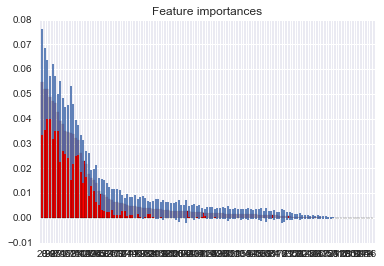

In [60]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Performance assessment through cross-validation

In [69]:
from sklearn.cross_validation import cross_val_score
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
scores = cross_val_score(rfc, X, y, cv=50, scoring='accuracy')
print(scores)
print('Achieved model score: ', np.mean(scores))

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
/Applications/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
/Applications/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
/Applications/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scor

[ 0.66666667  0.6969697   0.6969697   0.60606061  0.72727273  0.6875      0.625
  0.6875      0.6875      0.65625     0.71875     0.625       0.71875
  0.625       0.75        0.6875      0.625       0.71875     0.6875
  0.65625     0.59375     0.625       0.65625     0.65625     0.6875
  0.74193548  0.70967742  0.67741935  0.74193548  0.67741935  0.73333333
  0.76666667  0.7         0.7         0.66666667  0.66666667  0.7
  0.83333333  0.73333333  0.7         0.66666667  0.7         0.76666667
  0.76666667  0.8         0.7         0.73333333  0.8         0.7         0.8       ]
Achieved model score:  0.699013196481


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
/Applications/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
/Applications/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
/Applications/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scor

Visualize score results as boxplots

{'boxes': [<matplotlib.lines.Line2D at 0x11840d438>],
 'caps': [<matplotlib.lines.Line2D at 0x118413828>,
 'fliers': [<matplotlib.lines.Line2D at 0x118417978>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1190ab0b8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11840d5f8>,
  <matplotlib.lines.Line2D at 0x118413ef0>]}

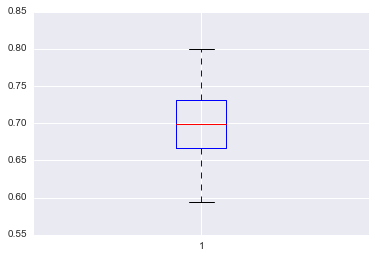

In [70]:
plt.boxplot(scores)

## TODO

- Verify if classifier should be categorical of binary
- Take into account the referee statistics in a smart way (see Slack discussion)
- Try different parameters for the random forest to compare results (bias, variance)
- Bonus
- Exercise 2
